## Data Collection

### NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [91]:
# Import all libraries in this cell
import urllib
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [92]:
USER_AGENT = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"
# US english
LANGUAGE = "en-US,en;q=0.5"

def get_soup(url):
    url = "https://covid19.ncdc.gov.ng"  
    page = urllib.request.urlopen(url).read()
    return BeautifulSoup(page)

def get_tables(soup):
    return soup.find_all("table")

def get_table_headers(table):
    headers=[]
    for th in table.find("tr").find_all("th"):
        headers.append(th.text.strip())
    return headers

def get_table_rows(table):
    rows=[]
    for tr in table.find_all("tr")[1:]:
        cells=[]
        tds=tr.find_all("td")
        if len(tds) ==0:
            ths=tr.find_all("th")
            for th in ths:
                cells.append(th.text.strip())
        else:
            for td in tds:
                cells.append(td.text.strip())
        rows.append(cells)
    return rows

def save_as_csv(table_name, headers, rows):
        pd.DataFrame(rows, columns=headers).to_csv(f"{table_name}.csv")

def main(url):
    # get the soup
    soup = get_soup(url)
    # extract all the tables from the web page
    tables = get_tables(soup)
    print(f"[+] Found a total of {len(tables)} tables.")
    # iterate over all tables
    for i, table in enumerate(tables, start=1):
        # get the table headers
        headers = get_table_headers(table)
        # get all the rows of the table
        rows = get_table_rows(table)
        # save table as csv file
        table_name = f"NCDC"
        print(f"[+] Saving {table_name}")
        save_as_csv(table_name, headers, rows)

In [93]:
if __name__ == "__main__":
    import sys
    try:
        url = sys.argv[1]
    except IndexError:
        print("Please specify a URL.\nUsage: python html_table_extractor.py [URL]")
        exit(1)
    main(url)

[+] Found a total of 1 tables.
[+] Saving NCDC


### B - John Hopkins Data Repository
Confirmed, Recovered and Death Cases are downloaded from the John Hopkins Data Repository using: 

* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [94]:
#[Write Your Code Here]
confirmed_global=pd.read_csv("confirmed_global.csv")
deaths_global=pd.read_csv("deaths_global.csv")
recovered_global=pd.read_csv("recovered_global.csv")

### C - External Data 

In [95]:
#[Write Your Code Here]
covid_external=pd.read_csv("covid_external.csv")
Budget=pd.read_csv("Budget data.csv")
RealGDP=pd.read_csv("RealGDP.csv")

## View Data

In [96]:
#[Write Your Code Here]
covid_external.head(3)

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93


In [97]:
Budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [98]:
RealGDP.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [99]:
print (confirmed_global.info())
confirmed_global.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 480 entries, Province/State to 5/11/21
dtypes: float64(2), int64(476), object(2)
memory usage: 1.0+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483


In [100]:
print (recovered_global.info())
recovered_global.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 480 entries, Province/State to 5/11/21
dtypes: float64(2), int64(476), object(2)
memory usage: 975.1+ KB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,53391,53391,53694,53750,53961,54019,54040,54222,54382,54503
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,110920,111792,112626,113468,114362,115253,116126,117089,118041,119061
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,85398,85534,85693,85869,86007,86149,86280,86420,86554,86703


In [101]:
print (deaths_global.info())
deaths_global.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 480 entries, Province/State to 5/11/21
dtypes: float64(2), int64(476), object(2)
memory usage: 1.0+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2637,2642,2648,2654,2664,2673,2683,2686,2698,2710
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2397,2399,2402,2403,2406,2408,2411,2412,2416,2420
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3270,3280,3289,3299,3307,3315,3321,3328,3335,3343


In [102]:
#[Write Your Code Here]
NCDC=pd.read_csv("NCDC.csv")
NCDC.columns
NCDC=NCDC.drop(['Unnamed: 0'],1)
print (NCDC.info())
NCDC.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB
None


,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"58,743","1,314","56,990",439
1,FCT,"19,842",572,"19,104",166
2,Kaduna,"9,068",1,"9,002",65
3,Plateau,"9,060",1,"9,002",57
4,Rivers,"7,174",33,"7,040",101


## Data Cleaning and Preparation

In [103]:
NCDC['No. of Cases (Lab Confirmed)']=NCDC['No. of Cases (Lab Confirmed)'].str.replace(',','')
NCDC['No. of Cases (on admission)']=NCDC['No. of Cases (on admission)'].str.replace(',','')
NCDC['No. Discharged']=NCDC['No. Discharged'].str.replace(',','')

In [104]:
NCDC[['No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged']]= NCDC[['No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged']].astype('int')
NCDC.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,58743,1314,56990,439
1,FCT,19842,572,19104,166
2,Kaduna,9068,1,9002,65
3,Plateau,9060,1,9002,57
4,Rivers,7174,33,7040,101


In [105]:
confirmed_global_nigeria=confirmed_global.loc[confirmed_global['Country/Region']=='Nigeria']
confirmed_global_nigeria=confirmed_global_nigeria.drop(['Province/State','Country/Region','Lat','Long'],1).T
confirmed_global_nigeria.reset_index(inplace=True)
confirmed_global_nigeria=confirmed_global_nigeria.rename(columns = {'index':'Date',200:'Confirmed Cases'})
confirmed_global_nigeria['Date']=pd.to_datetime(confirmed_global_nigeria['Date'])
confirmed_global_nigeria.tail()

,Date,Confirmed Cases
471,2021-05-07,165340
472,2021-05-08,165370
473,2021-05-09,165419
474,2021-05-10,165468
475,2021-05-11,165515


In [106]:
recovered_global_nigeria=recovered_global.loc[recovered_global['Country/Region']=='Nigeria']
recovered_global_nigeria=recovered_global_nigeria.drop(['Province/State','Country/Region','Lat','Long'],1).T
recovered_global_nigeria.reset_index(inplace=True)
recovered_global_nigeria=recovered_global_nigeria.rename(columns = {'index':'Date',185:'Recovered Cases'})
recovered_global_nigeria['Date']=pd.to_datetime(recovered_global_nigeria['Date'])
recovered_global_nigeria.tail()

,Date,Recovered Cases
471,2021-05-07,155454
472,2021-05-08,156250
473,2021-05-09,156297
474,2021-05-10,156318
475,2021-05-11,156358


In [107]:
deaths_global_nigeria=deaths_global.loc[deaths_global['Country/Region']=='Nigeria']
deaths_global_nigeria=deaths_global_nigeria.drop(['Province/State','Country/Region','Lat','Long'],1).T
deaths_global_nigeria.reset_index(inplace=True)
deaths_global_nigeria=deaths_global_nigeria.rename(columns = {'index':'Date',200:'Deaths'})
deaths_global_nigeria['Date']=pd.to_datetime(deaths_global_nigeria['Date'])
deaths_global_nigeria.tail()

,Date,Deaths
471,2021-05-07,2065
472,2021-05-08,2065
473,2021-05-09,2065
474,2021-05-10,2065
475,2021-05-11,2065


## Analysis

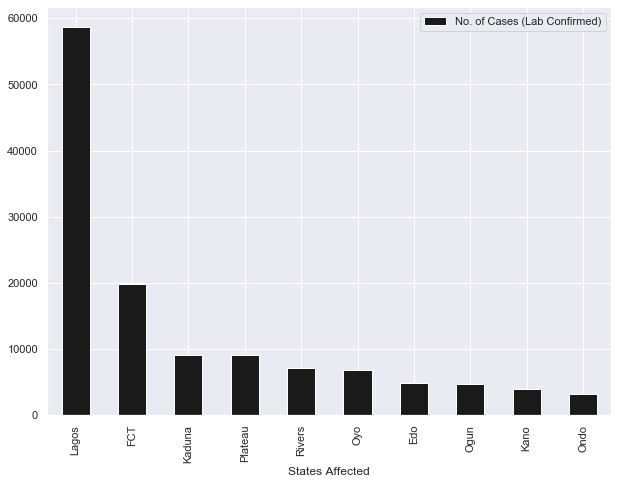

In [108]:
sns.set(rc={'figure.figsize':(9,7)})
Top_10_Confirmed=NCDC.nlargest(10,['No. of Cases (Lab Confirmed)'])
Top_10_Confirmed=Top_10_Confirmed.drop(['No. of Cases (on admission)','No. Discharged','No. of Deaths'],1)
Top_10_Confirmed.plot.bar(x='States Affected',color='k')

The figure above shows the Top 10 States affected by Covid 19 in Nigeria with Lagos being the epicenter, followed by the Federal Capital Territory (FCT, Abuja) and then Kaduna

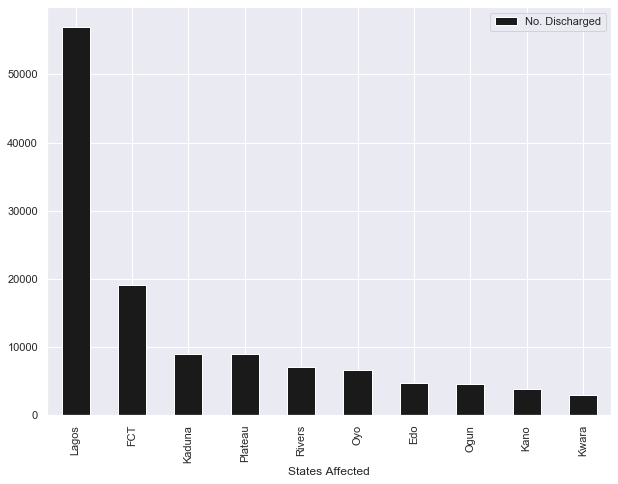

In [109]:
sns.set(rc={'figure.figsize':(9,7)})
Top_10_Discharged=NCDC.nlargest(10,['No. Discharged'])
Top_10_Discharged=Top_10_Discharged.drop(['No. of Cases (Lab Confirmed)','No. of Cases (on admission)','No. of Deaths'],1)
Top_10_Discharged.plot.bar(x='States Affected',color='k')

The chart above shows the Recovery rate for states in Nigeria with Lagos, FCT and Kaduna as the top 3 states with the highest recovery rates.

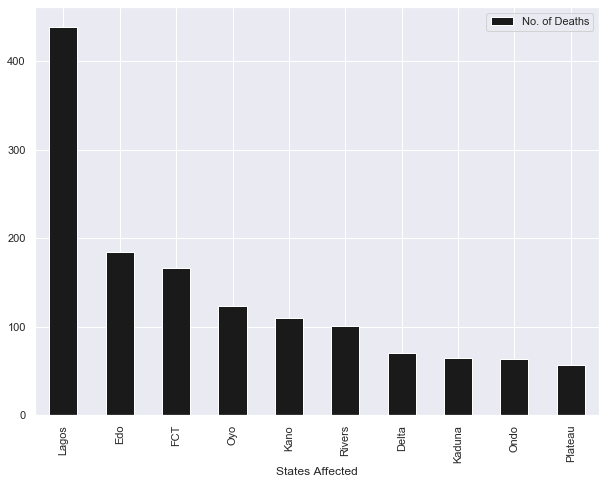

In [110]:
sns.set(rc={'figure.figsize':(9,7)})
Top_10_Deaths=NCDC.nlargest(10,['No. of Deaths'])
Top_10_Deaths=Top_10_Deaths.drop(['No. of Cases (Lab Confirmed)','No. of Cases (on admission)','No. Discharged'],1)
Top_10_Deaths.plot.bar(x='States Affected',color='k')

This plot shows the fatality rate in Nigeria. It is understandable that Lagos has a high death rate since it has a high number of confirmed cases. Also notice, that although FCT is the second most occuring, it is the third in terms of fatality rates. 

Also, Edo which is the 6th most affected state in terms of confirmed cases is the second highest in terms of death rates. This means that Edo State is lacking in terms of providing sufficient health care to increase the number of Recovery Cases. 

We can also notice that Plateau was not on the list of the top ten confirmed cases but it is in the list of the Top 10 Fatality Rate.  

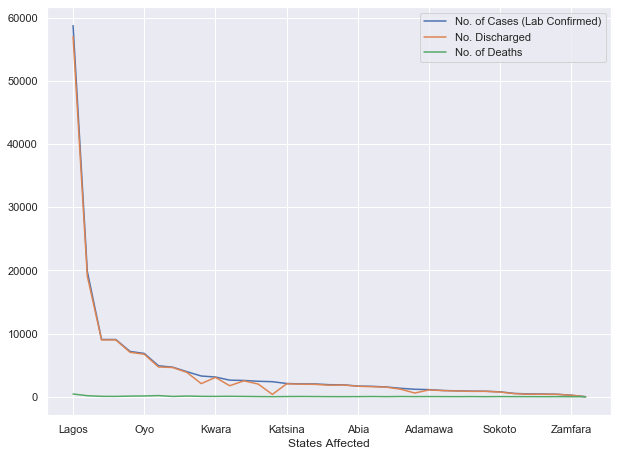

In [111]:
sns.set(rc={'figure.figsize':(9,7)})
NCDC.plot.line(x='States Affected',y=['No. of Cases (Lab Confirmed)','No. Discharged','No. of Deaths'])

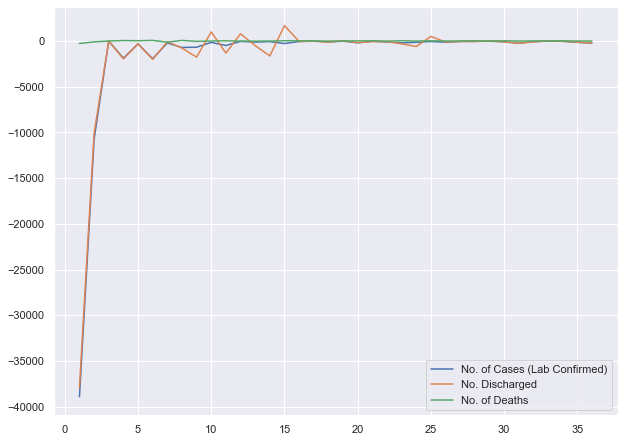

In [112]:
sns.set(rc={'figure.figsize':(9,7)})
NCDC1=NCDC[['No. of Cases (Lab Confirmed)','No. Discharged','No. of Deaths']]
NCDC1.diff().plot.line()

In [113]:
confirmed_global_nigeria.max()['Date'].strftime('%d/%m/%Y')
confirmed_global_nigeria.max()['Confirmed Cases']
print ("The maximum infection rate for a day is: {} and the date it occured is {}".format(confirmed_global_nigeria.max()['Confirmed Cases'],confirmed_global_nigeria.max()['Date'].strftime('%d/%m/%Y'))
)

The maximum infection rate for a day is: 165515 and the date it occured is 11/05/2021


In [114]:
NCDC=NCDC.rename(columns={"States Affected":"states"})

In [115]:
new=pd.merge(NCDC, covid_external, on="states")
#Top10Grouped=new.nlargest(10, ['No of Cases (Lab Confirmed)'])
Top_10_Grouped=new.nlargest(10,['No. of Cases (Lab Confirmed)'])

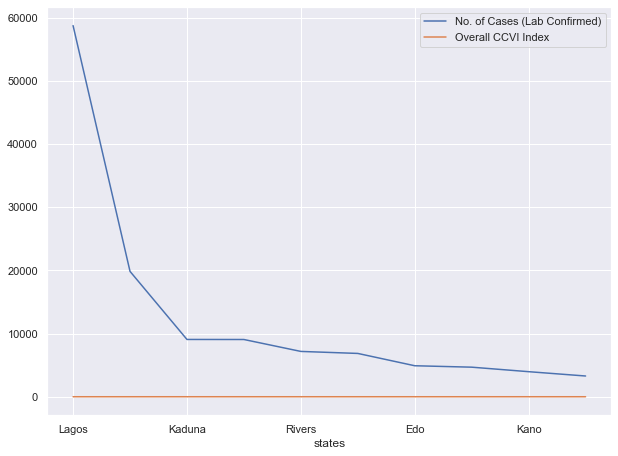

In [116]:
Top_10_Grouped.plot.line(x='states',y=['No. of Cases (Lab Confirmed)','Overall CCVI Index'])

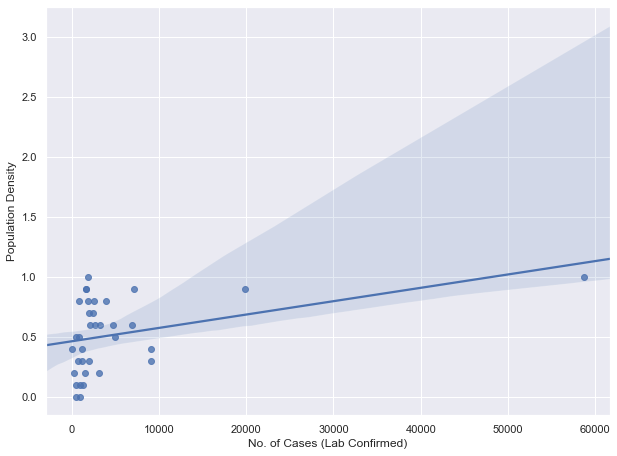

In [117]:
sns.regplot(x=new['No. of Cases (Lab Confirmed)'],y=new['Population Density'])

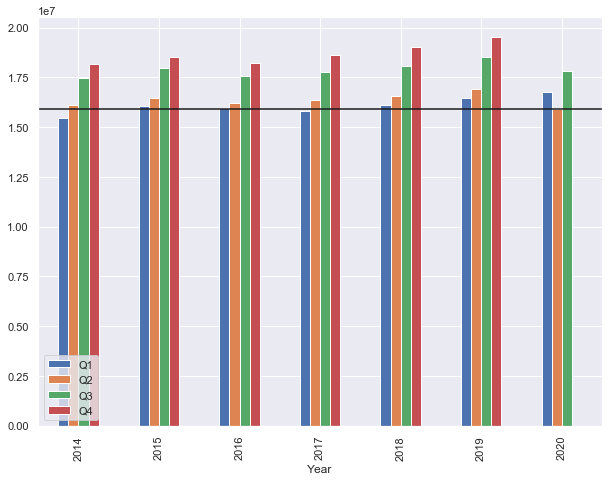

In [118]:
RealGDP.plot.bar(x='Year')
plt.legend(loc='lower left')
plt.axhline(y=15890000.00, xmin=0, xmax=1.5,color='k')
plt.show()

The Plot above (approximated by the line), shows that the Second Quarter of 2020 (which is the time Covid 19 had the greatest impact in Nigeria), has the lowest GDP. With the first and third Quarters (which had less impact) greater. This shows the influence on Covid 19 on the Economy of Nigeria

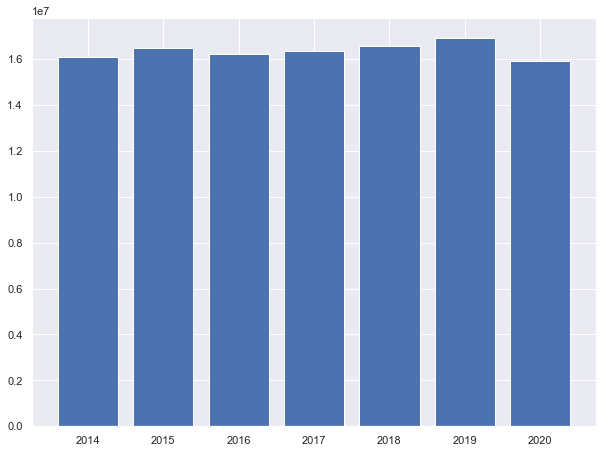

In [119]:
#ax=plt.bar(RealGDP['Q2'])
#ax.set_xticklabels(['zero','two','four','six'])
plt.bar(x=RealGDP['Year'],height=RealGDP['Q2'])
plt.show()

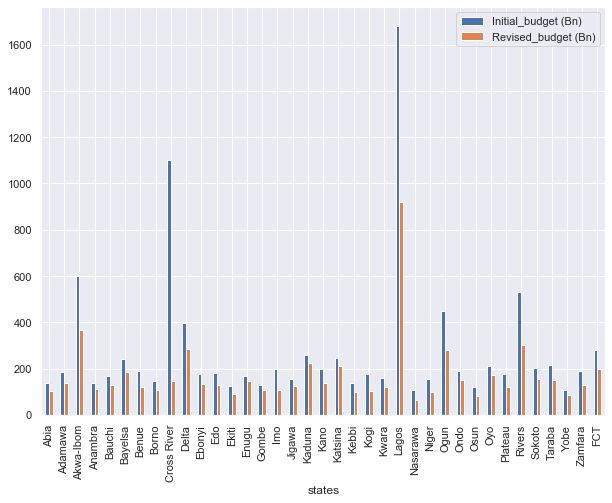

In [120]:
Budget.plot.bar(x='states')
#plt.axhline(y=15890000.00, xmin=0, xmax=1.5,color='k')
plt.show()

In the plot above, the effect of Covid 19 on the Budget is demonstrated, with Lagos being the state with the greatest change followed by Cross River, Akwa Ibom and Rivers.